# Principal Component Analysis

In [1]:
# EDA#importing lib's
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.decomposition import PCA

# EDA

In [3]:
#Reading csv file
df=pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 14)

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

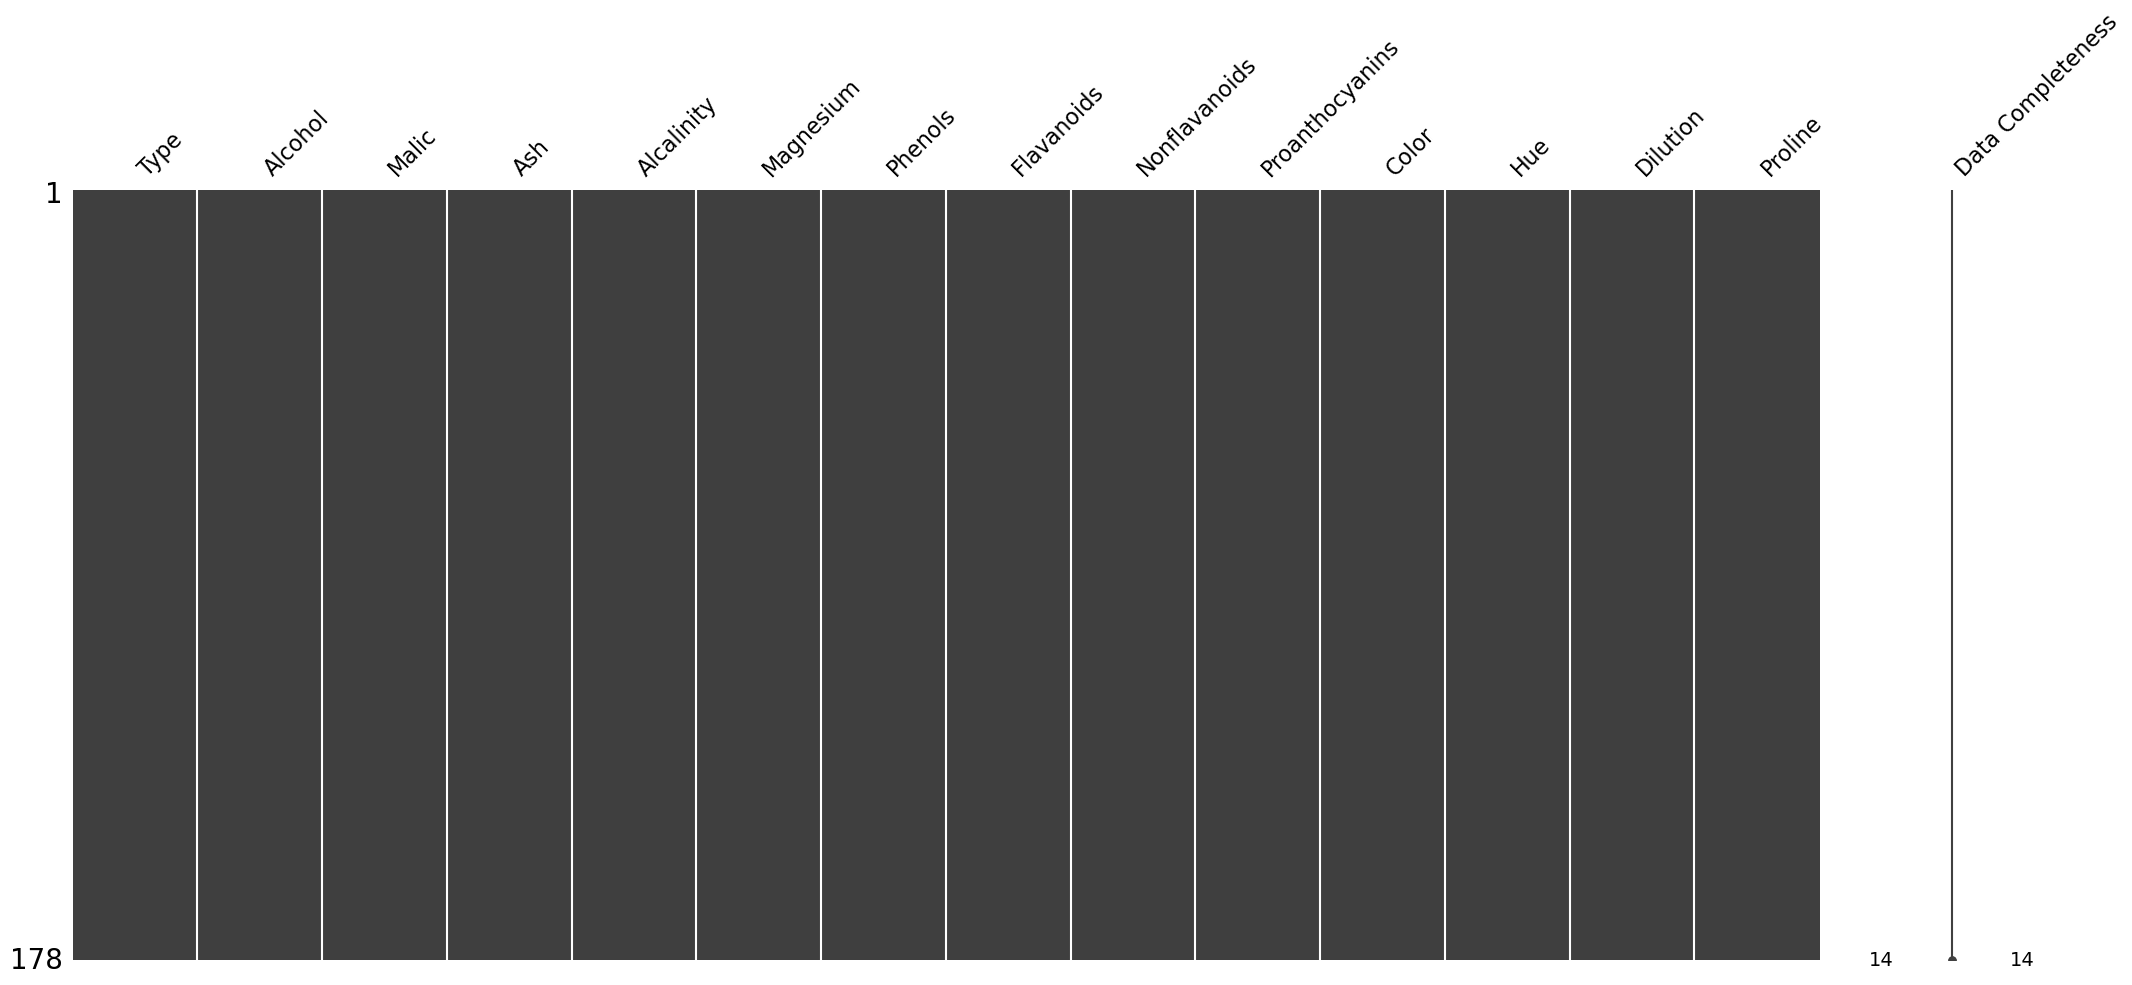

In [7]:
#finding null values
import missingno as msno

msno.matrix(df, labels=True, sort="descending");
df.isnull().sum()

In [8]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


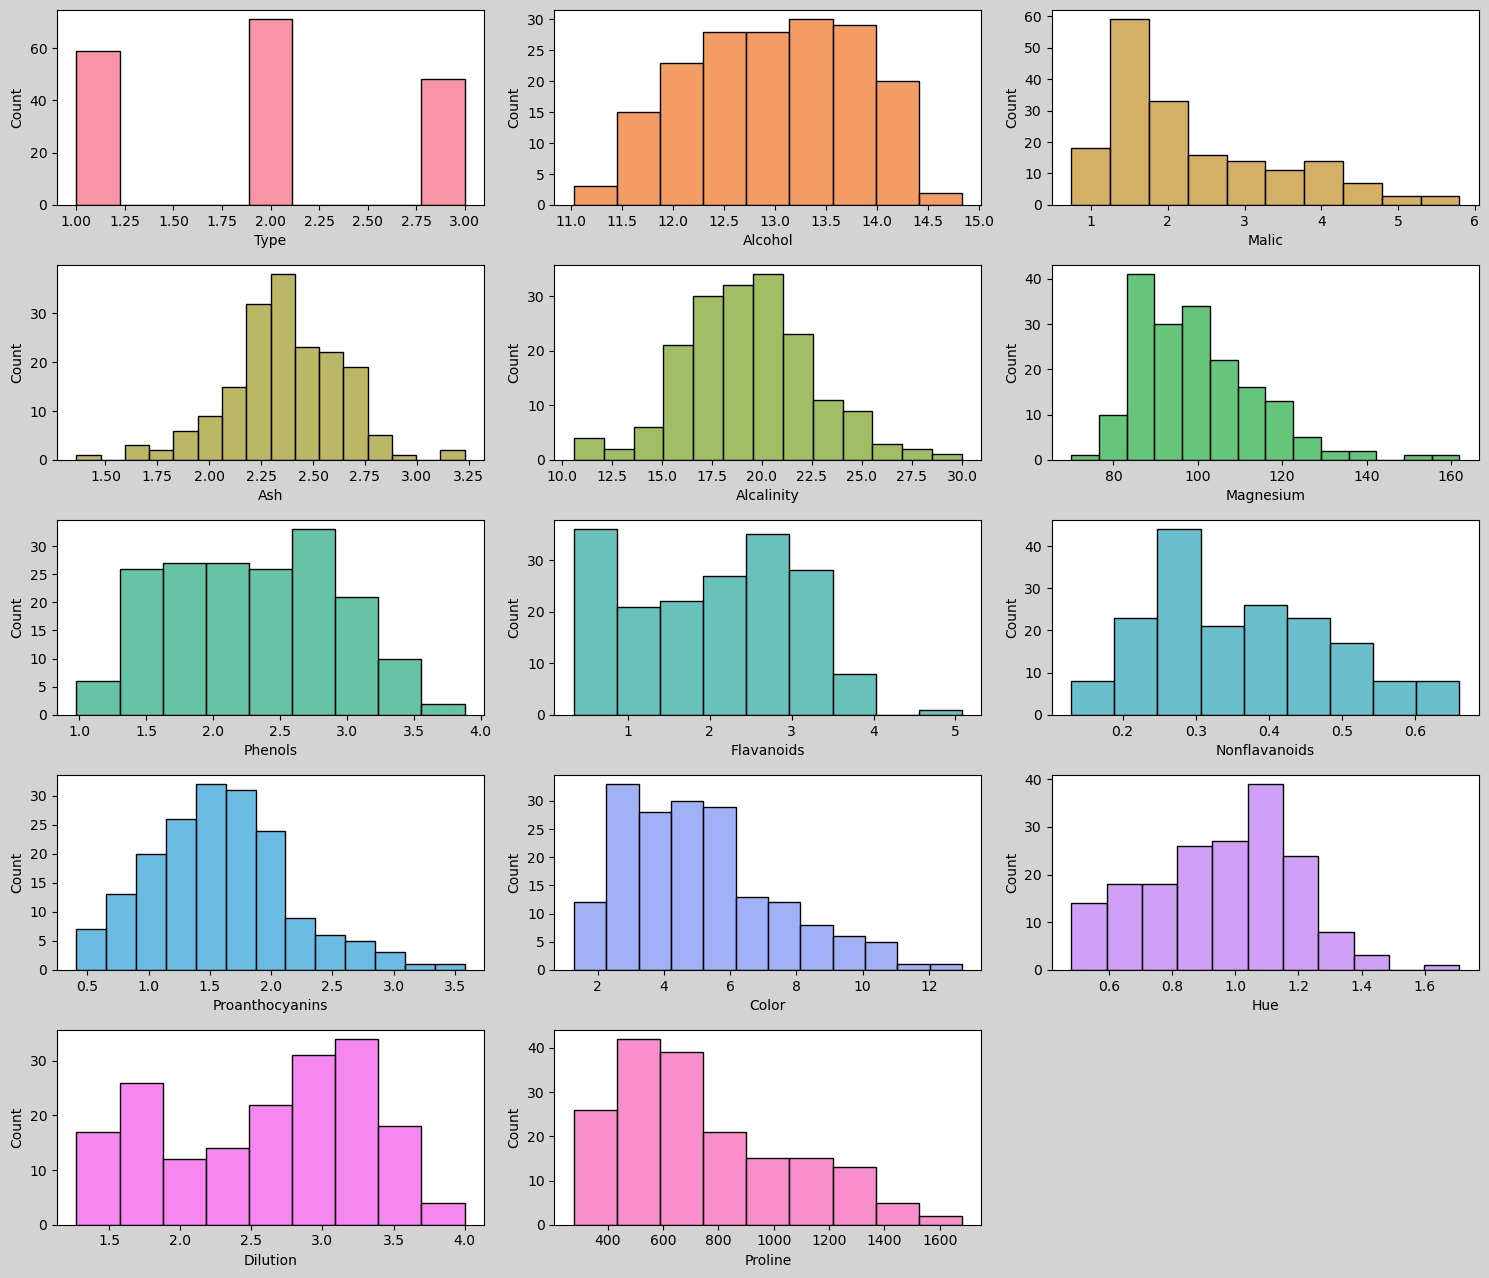

In [27]:
import matplotlib.pyplot as plt
c=3
r=6
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

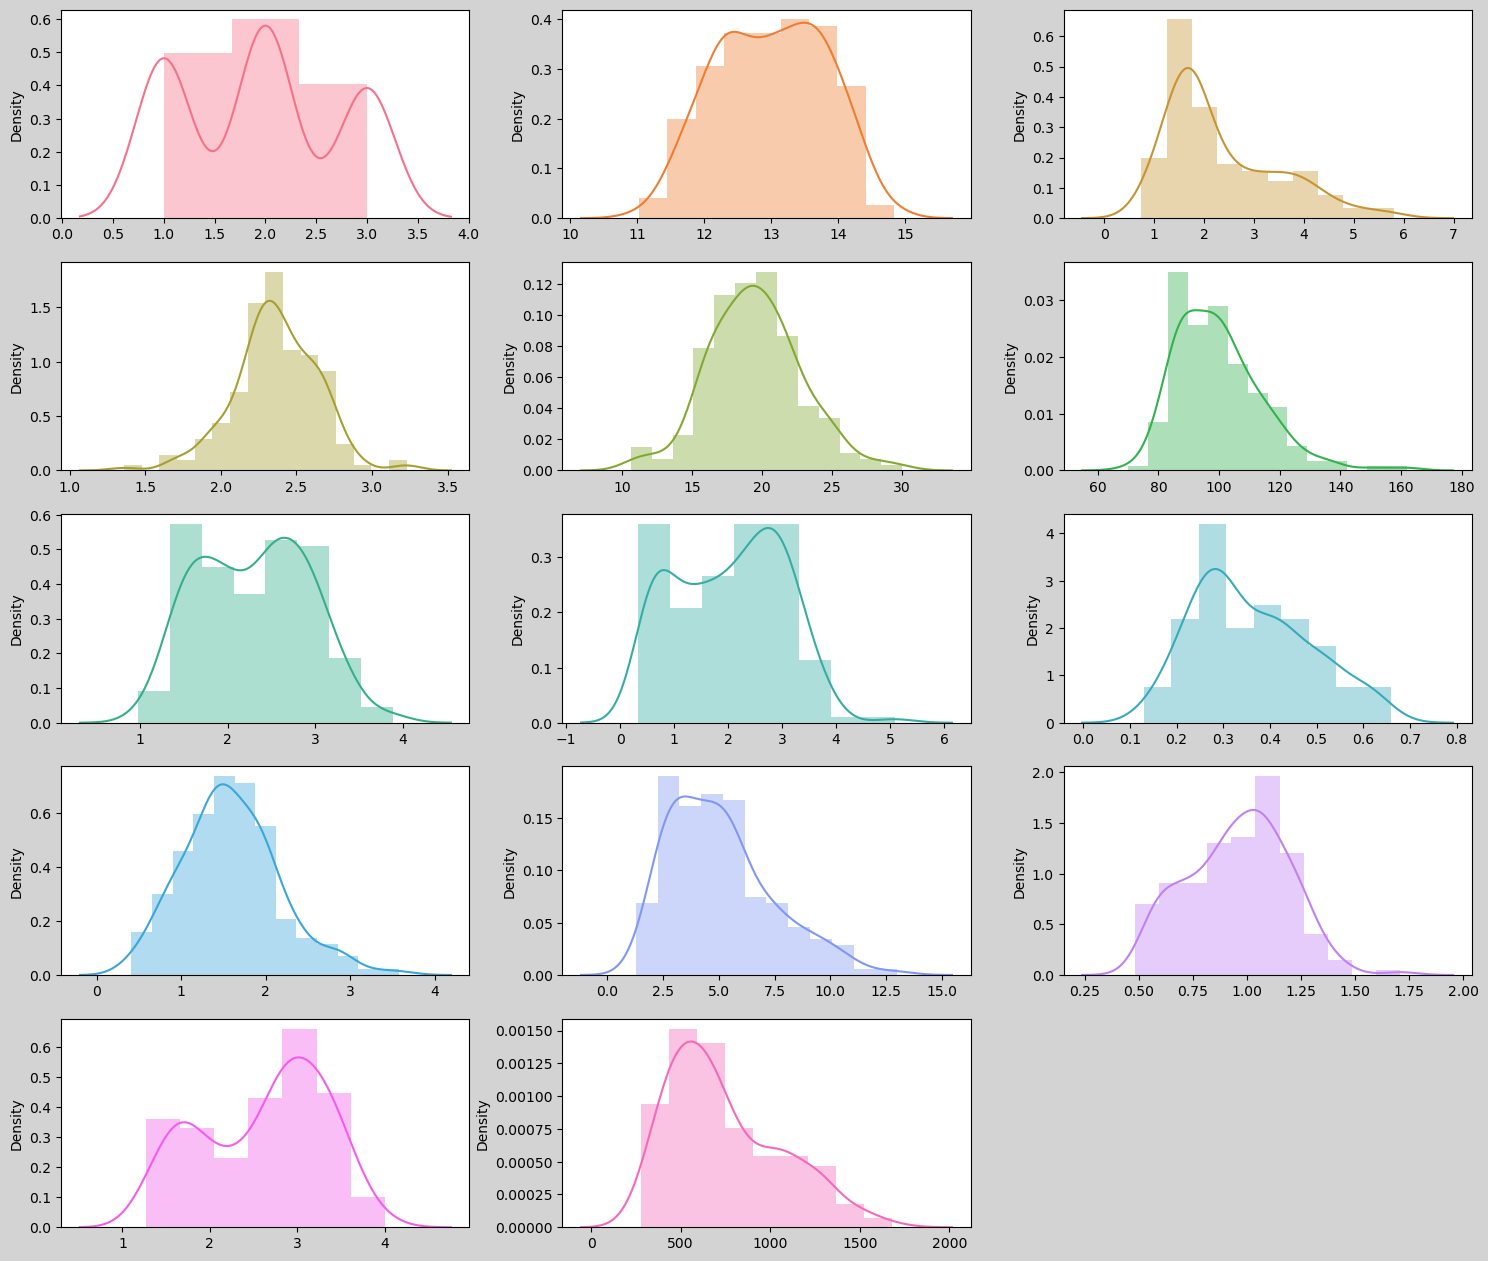

In [30]:
#performing univerent analysis
import warnings
warnings.filterwarnings('ignore')
c=3
r=6
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.distplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

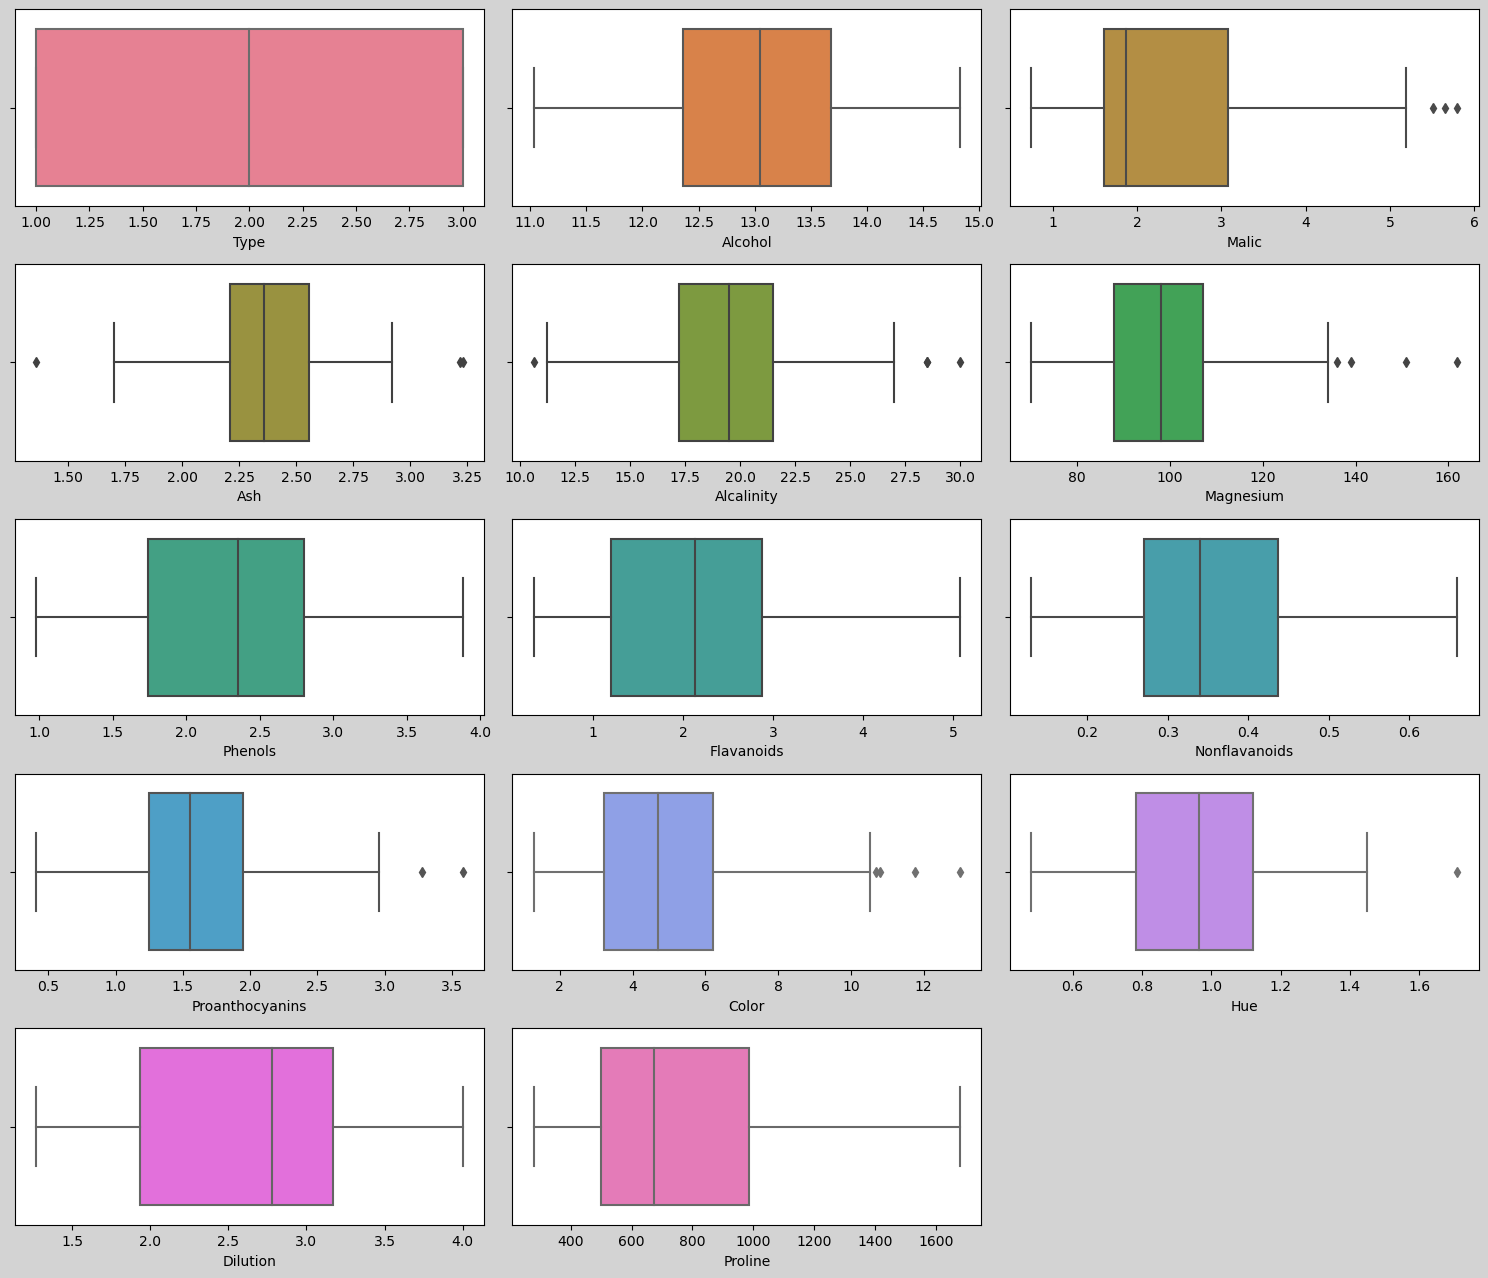

In [29]:
c=3
r=6
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


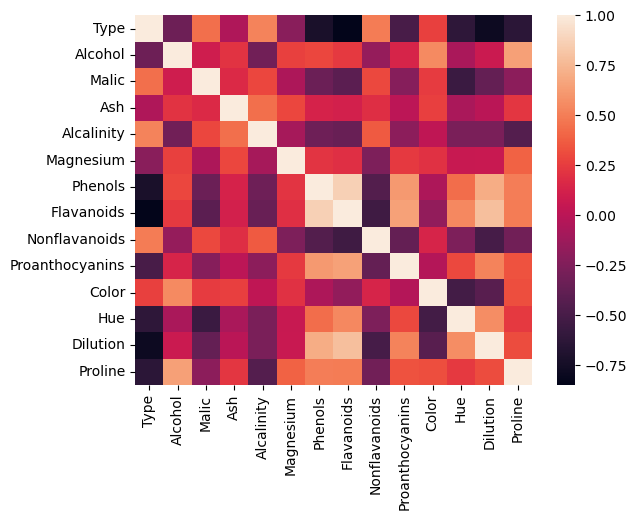

In [31]:
#Finding Corelation for all variables

sns.heatmap(df.corr())
df.corr()

In [36]:
scale=StandardScaler().fit_transform(df)
pca=PCA(n_components=2).fit_transform(scale)

In [37]:
#creating the kmeans clustring
kmean=KMeans(n_clusters=3,init='k-means++',random_state=0)
model=kmean.fit_predict(pca)
model

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Text(0.5, 0, 'number of clusters')

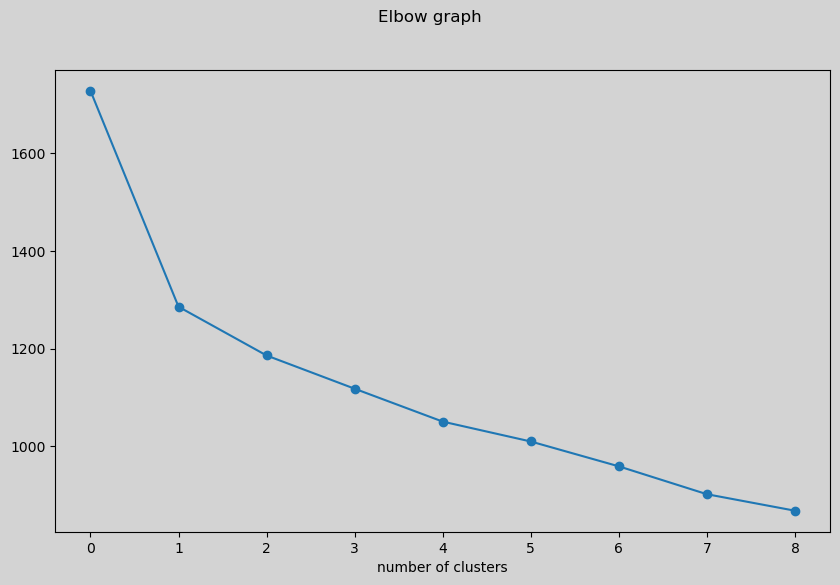

In [38]:
#lets find the ideal numbers of clusters
wcss=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    model=kmeans.fit_predict(scale)
    wcss.append(kmeans.inertia_)
    
#lets plot ELbow graph and find the ideal number of clusters
plt.figure(figsize=(10,6),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')    
plt.suptitle('Elbow graph')
plt.plot(wcss,marker='o')
plt.xlabel('number of clusters')

In [39]:
#from the above graph i came to know that 2 or 3 clusters would be sufficient 

kmean=KMeans(n_clusters=2,init='k-means++',random_state=0,)
model=kmean.fit_predict(pca)
df['cluster']=model

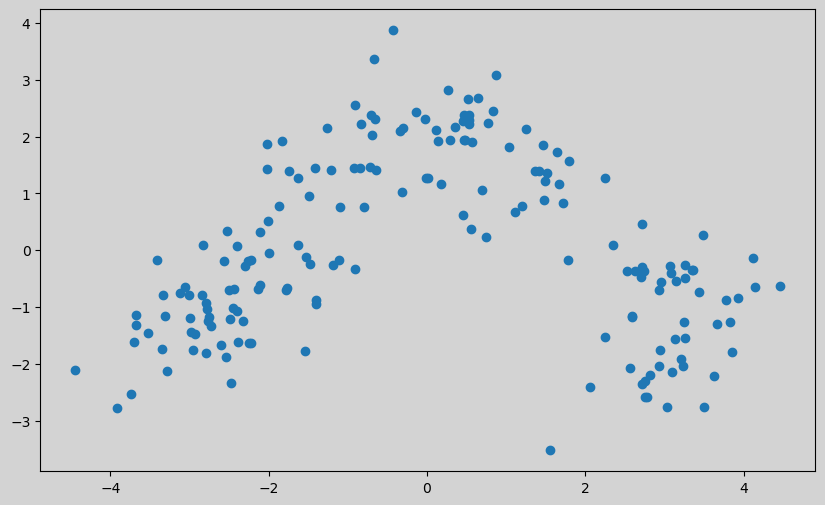

In [41]:
#for plot i have used pca method
plt.figure(figsize=(10,6),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')    
plt.scatter(pca[:,0],pca[:,1])

In [42]:
a=pca[model==0]
b=pca[model==1]

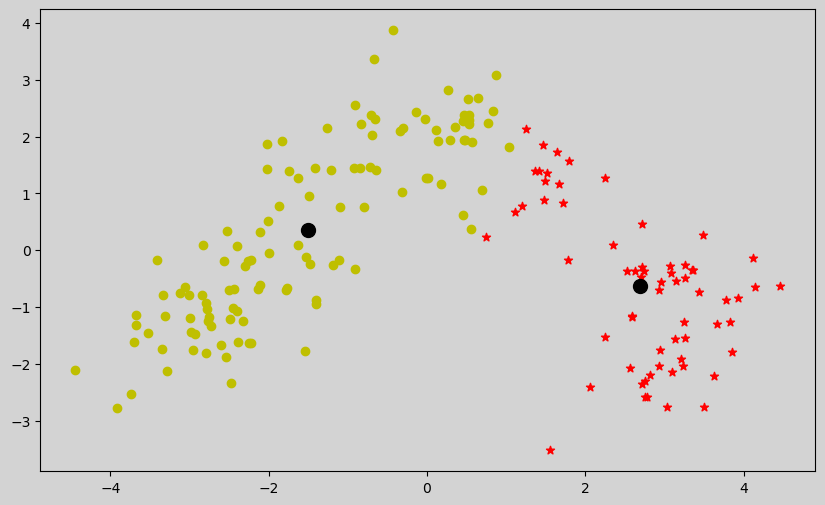

In [45]:
plt.figure(figsize=(10,6),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
plt.scatter(a[:,0],a[:,1],c='r',marker='*')
plt.scatter(b[:,0],b[:,1],c='y',marker='o')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],c='k',s=100)

In [46]:
silhouette_score(pca,kmean.labels_,metric='euclidean',random_state=0)

0.4919201452430614

In [47]:
#from the above graph i came to know that 2 or 3 clusters would be sufficient 

kmean=KMeans(n_clusters=3,init='k-means++',random_state=0,)
model=kmean.fit_predict(pca)
df['cluster']=model

In [48]:
a=pca[model==0]
b=pca[model==1]
c=pca[model==2]

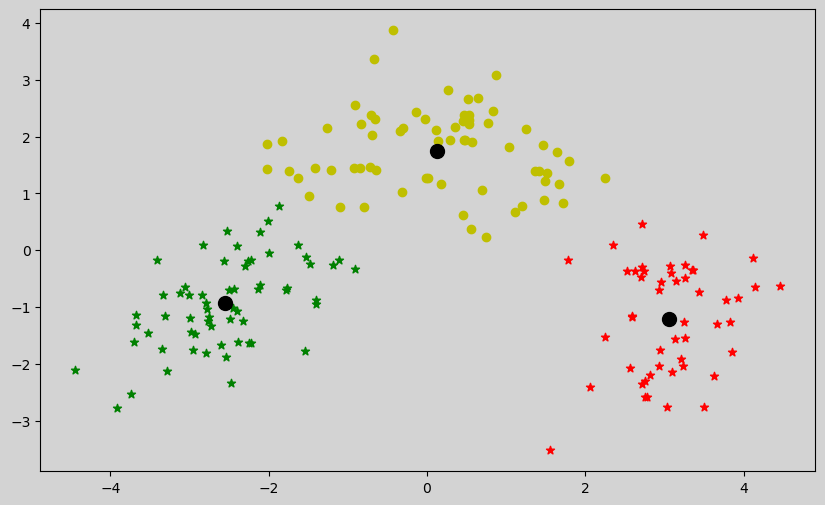

In [49]:
plt.figure(figsize=(10,6),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
plt.scatter(a[:,0],a[:,1],c='r',marker='*')
plt.scatter(b[:,0],b[:,1],c='y',marker='o')
plt.scatter(c[:,0],c[:,1],c='g',marker='*')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],c='k',s=100)

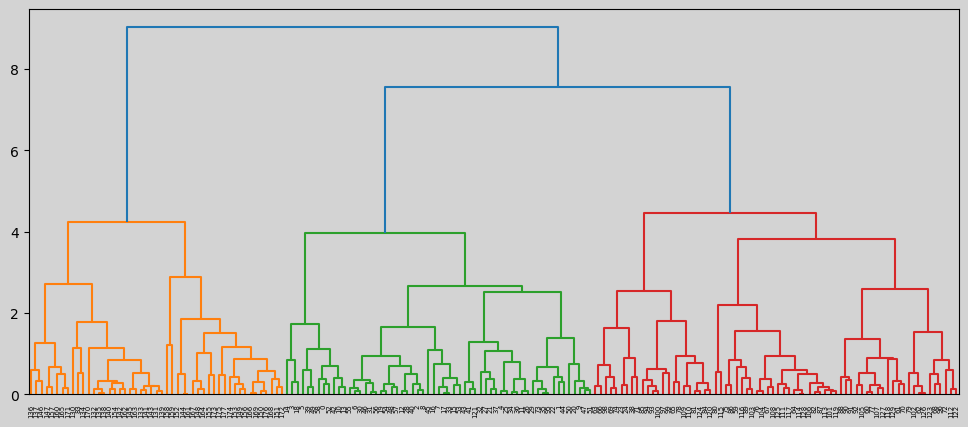

In [50]:
#now lets use heirarchial clustrings
plt.figure(figsize=(12,5),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
dendogram=hierarchy.dendrogram(hierarchy.linkage(pca,method='complete',metric='euclidean'))

In [51]:
from sklearn.cluster import AgglomerativeClustering


In [52]:
model=AgglomerativeClustering(n_clusters=2,affinity='euclidean')
model.fit_predict(pca)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [53]:
silhouette_score(pca,model.labels_,metric='euclidean')

0.5065851661463036

In [58]:
#i have divided pca into 2 parts so that around 99% of data are considered and used to create model
pca = PCA(n_components = 3)
pca_values = pca.fit_transform(df)

In [59]:
var = pca.explained_variance_ratio_
var

array([9.98083877e-01, 1.73591130e-03, 9.67971139e-05])

In [60]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([99.81, 99.98, 99.99])

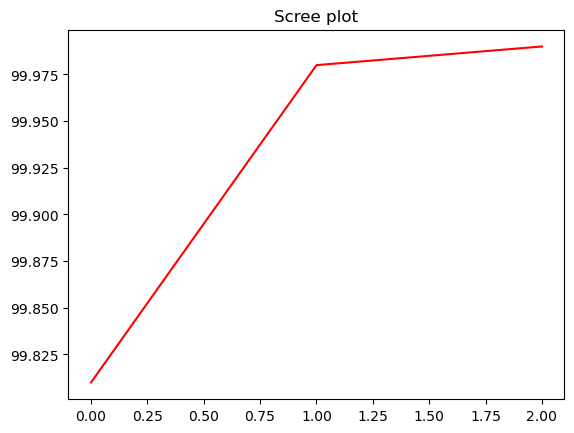

In [61]:
plt.plot(var1,color="red")
plt.title('Scree plot')
plt.show()